In [483]:
import sys
sys.path.append("../../src")

In [484]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [485]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [486]:
import data

In [487]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A1I3TPX8GA7ISU:3634BBTX0PI2DDMJKQL1T7BJTU3IF4. Status was 1.
Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid debugL9306E:debugJT1KTE. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.


In [488]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 35 dupe results.


In [489]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [490]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [491]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [492]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [493]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,11532.0,0.0-3.0,2021-08-23 19:33:33.192,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,solid,full,False,False,NaN
4,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,6128.0,0.0-4.0,2021-08-23 19:33:39.325,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,liquid,full,False,False,NaN
5,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,7564.0,0.0-5.0,2021-08-23 19:33:46.893,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,empty,False,False,NaN
6,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,9300.0,0.0-6.0,2021-08-23 19:33:56.197,04_comprehension_swarm-full,...,<NA>,NaN,87.0,False,practice,solid,empty,False,False,0.751921
7,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,4540.0,0.0-7.0,2021-08-23 19:34:00.742,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,full,False,False,NaN


In [494]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [495]:
len(response_df.reset_index().uniqueid.unique())

53

### Demo

In [496]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

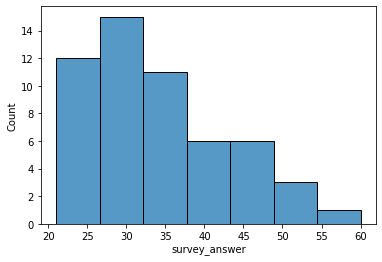

In [497]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [498]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    32
Master's degree      16
Some college          5
High school/GED       1
Name: survey_answer, dtype: int64

In [499]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    54
Name: survey_answer, dtype: int64

### Comments

In [500]:
qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer

trial_index  uniqueid                                     
39           AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q                                            nice
             AQXZUVF2QWLYS:3SPJ033422R48FNK7YYOGY0DJ4RYJ2                                            None
             A2JDYN6QM8M5UN:3WRFBPLXRBCZB2HHXBXQJBLHJN23N6                                               
             A841L4KV38XUZ:32N49TQG3H6C3SPB8HYRG0T0B0WAVQ                                            GOOD
             A2HXUTHYA5C1E0:3OB0CAO74ID8H9SUJYV34LKY6CNYHX                                               
             A2UT8RHEQUDSGG:3EG49X351V03KFI3IJIXOGOZVSO6X9                                               
             A1P6OXEJ86HQRM:3E7TUJ2EGDAC4SFKPQKXEJC95BAD9F                                               
             A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU                                               
             A2GOYSTIL3LOV1:3PB5A5BD0WUB2T1ICJNL68O0NDJ7GO                                   

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

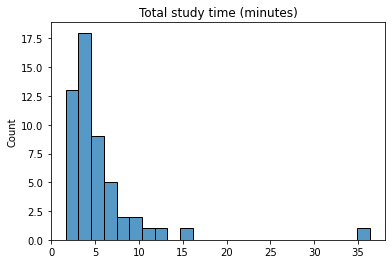

In [501]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [502]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.532367
std     5.151603
Name: rt, dtype: float64

### Response times

In [503]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

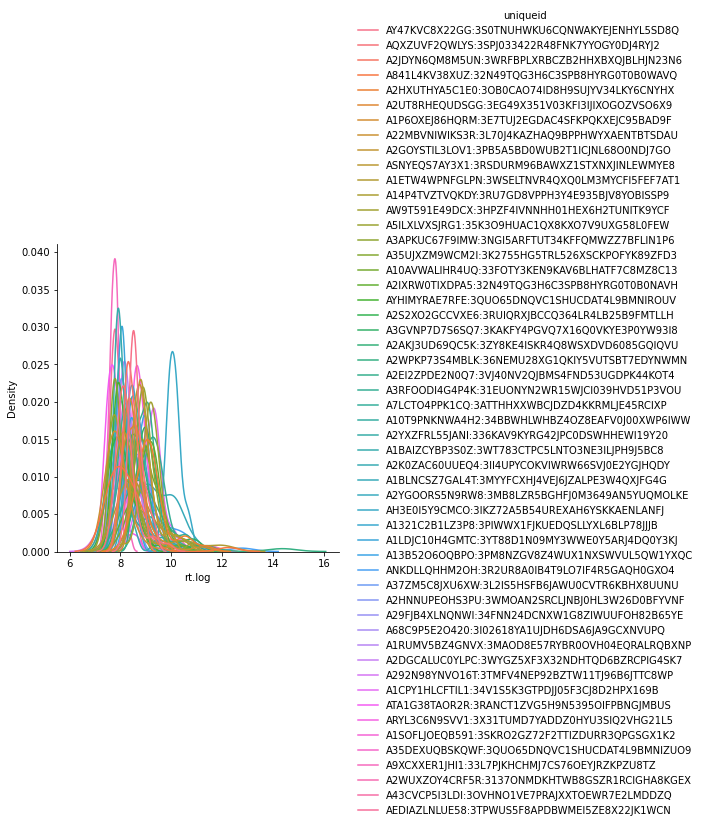

In [504]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

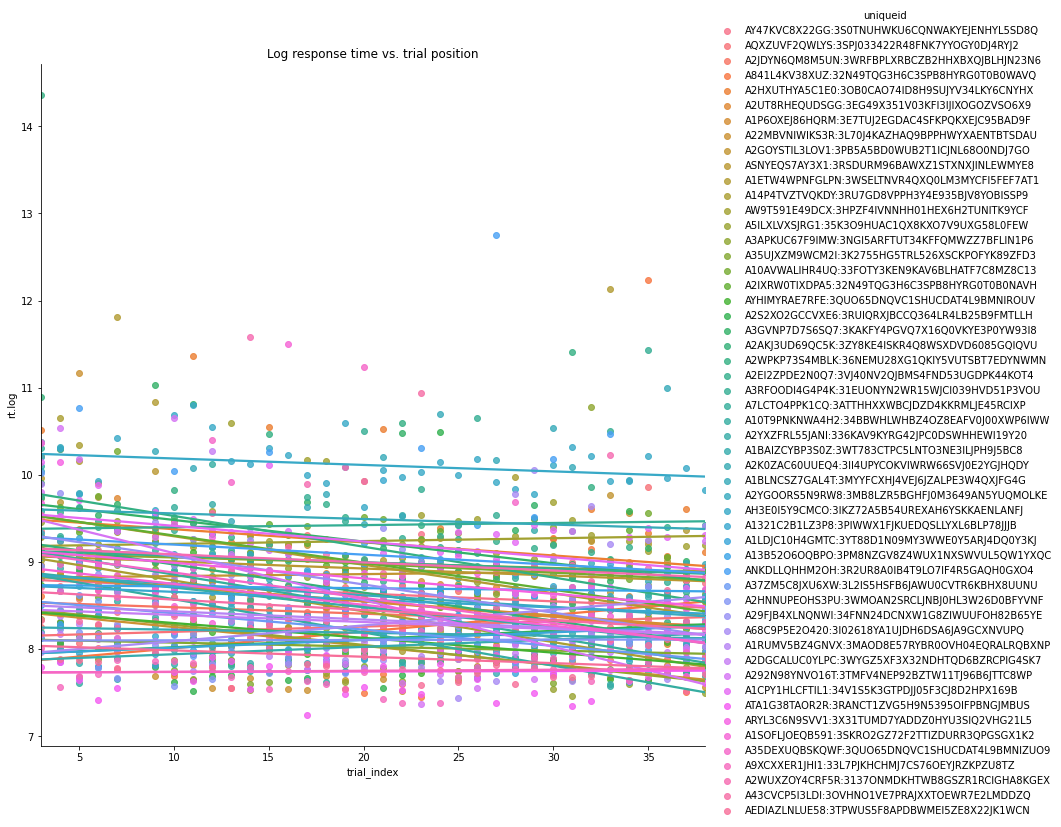

In [505]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

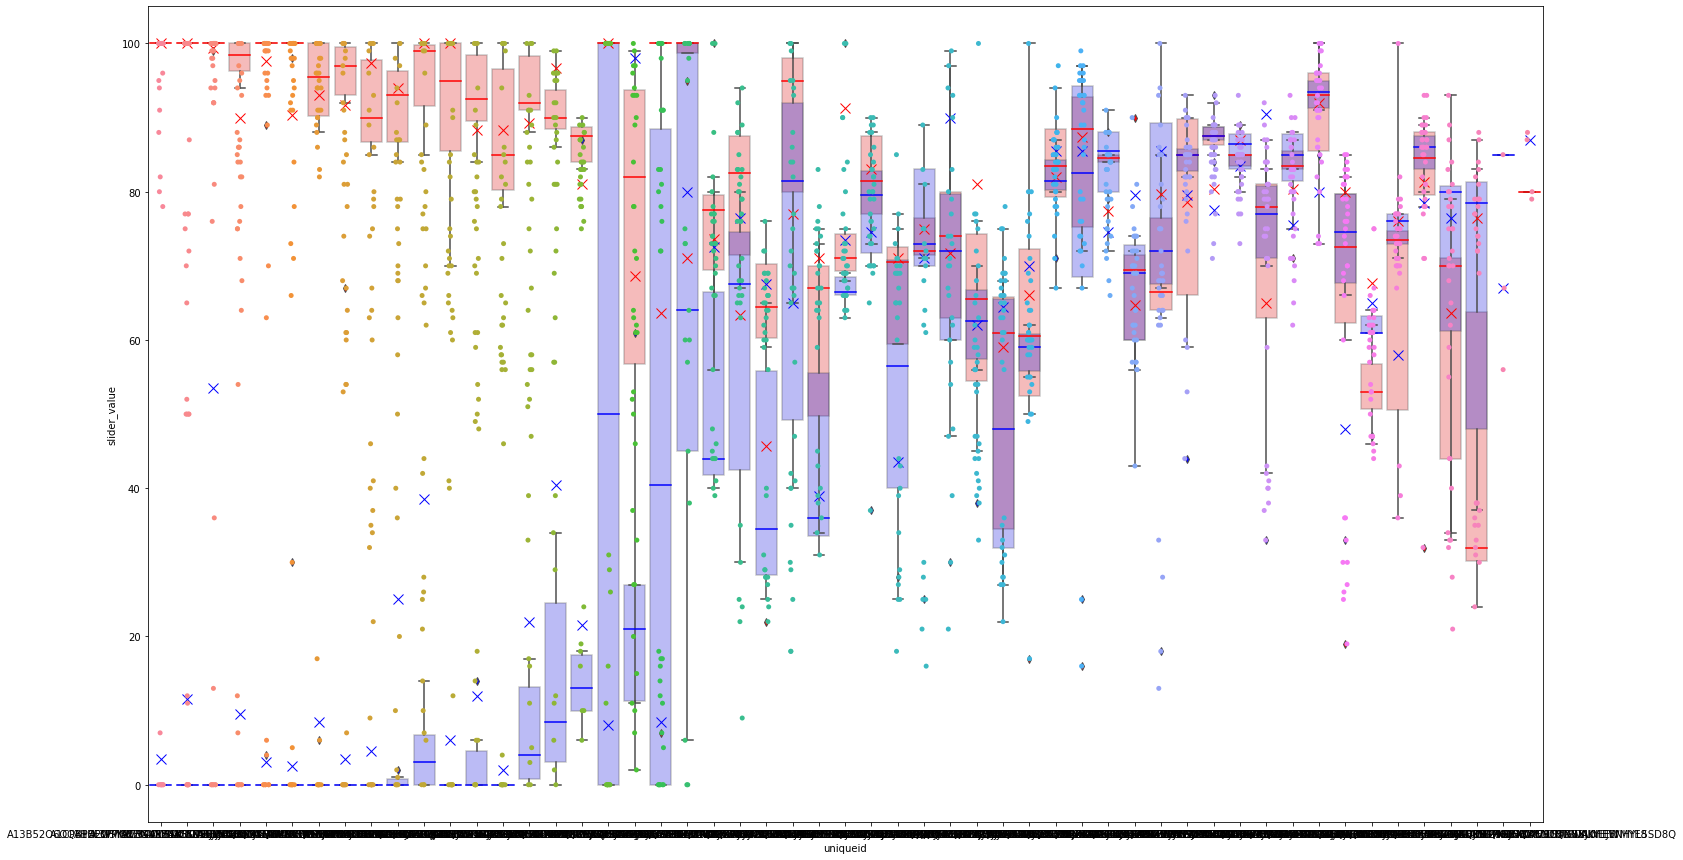

In [506]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

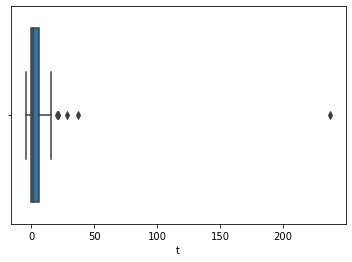

In [507]:
from scipy.stats import ttest_ind
def compute_practice_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" practice items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "practice"]
    
    # Filter out copouts (and print warning -- practice should not trigger copout)
    copout_rows = practice_rows[practice_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {practice_rows.iloc[0].name} had {len(copout_rows)} practice copout(s). Seems fishy.")
    practice_rows = practice_rows[~practice_rows.slider_copout]
    
    full_practice = practice_rows[practice_rows.condition_2 == "full"]
    empty_practice = practice_rows[practice_rows.condition_2 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.boxplot(data=practice_stats.reset_index(), x="t", hue="uniqueid")

In [508]:
practice_stats.sort_values("t")

,t,pval
uniqueid,,
AQXZUVF2QWLYS:3SPJ033422R48FNK7YYOGY0DJ4RYJ2,-4.098004,2.628409e-02
A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF,-1.544744,2.201141e-01
A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9,-1.390622,2.585427e-01
A9XCXXER1JHI1:33L7PJKHCHMJ7CS76OEYJRZKPZU8TZ,-1.070259,3.629583e-01
A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU,-1.003163,3.896963e-01
A3GVNP7D7S6SQ7:3KAKFY4PGVQ7X16Q0VKYE3P0YW93I8,-0.928548,4.216149e-01
A2DGCALUC0YLPC:3WYGZ5XF3X32NDHTQD6BZRCPIG4SK7,-0.906217,4.316259e-01
A2S2XO2GCCVXE6:3RUIQRXJBCCQ364LR4LB25B9FMTLLH,-0.467205,6.721943e-01
A35DEXUQBSKQWF:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9,-0.354632,7.463292e-01


#### Practice copouts

In [509]:
response_df[response_df.condition_0 == "practice"].groupby(["condition_1", "condition_2"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

mean  count
condition_1 condition_2                 
abstract    full         0.075472     53
solid       empty        0.075472     53
            full         0.075472     53
abstract    empty        0.056604     53
liquid      full         0.056604     53

### Fillers

<AxesSubplot:xlabel='t'>

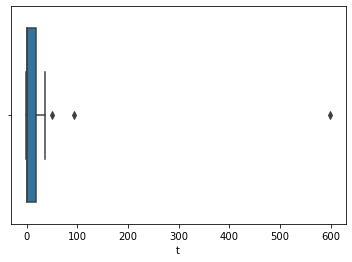

In [510]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [511]:
filler_stats.sort_values("t")

,t,pval
uniqueid,,
A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW,-1.720933,1.159980e-01
A5ILXLVXSJRG1:35K3O9HUAC1QX8KXO7V9UXG58L0FEW,-1.381426,1.972313e-01
A37ZM5C8JXU6XW:3L2IS5HSFB6JAWU0CVTR6KBHX8UUNU,-1.005735,3.382585e-01
A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU,-0.876703,4.034415e-01
A2K0ZAC60UUEQ4:3II4UPYCOKVIWRW66SVJ0E2YGJHQDY,-0.745421,4.750336e-01
AYHIMYRAE7RFE:3QUO65DNQVC1SHUCDAT4L9BMNIROUV,-0.694988,5.028914e-01
A35UJXZM9WCM2I:3K2755HG5TRL526XSCKPOFYK89ZFD3,-0.422577,6.815463e-01
ATA1G38TAOR2R:3RANCT1ZVG5H9N5395OIFPBNGJMBUS,-0.363744,7.236217e-01
A1LDJC10H4GMTC:3YT88D1N09MY3WWE0Y5ARJ4DQ0Y3KJ,-0.285262,7.812645e-01


#### Filler copouts

In [512]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

,,mean,count
item_id,condition_1,,
3.0,empty,0.075472,53
5.0,empty,0.075472,53
6.0,full,0.075472,53
8.0,full,0.075472,53
10.0,full,0.075472,53
11.0,full,0.075472,53
0.0,empty,0.056604,53
1.0,empty,0.056604,53
4.0,empty,0.056604,53


## Final data processing

In [513]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [514]:
practice_drops = practice_stats[(practice_stats.t < 0) | (practice_stats.pval > 1e-1) | practice_stats.t.isna()]
drop_pct = np.round(len(practice_drops) / len(practice_stats.index) * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops.index))
exp_items = exp_items.drop(practice_drops.index, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / len(filler_stats.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

35 subjects (66.0%) disqualified and dropped due to failed practice.
	A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW
	A1321C2B1LZ3P8:3PIWWX1FJKUEDQSLLYXL6BLP78JJJB
	A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9
	A1BAIZCYBP3S0Z:3WT783CTPC5LNTO3NE3ILJPH9J5BC8
	A1ETW4WPNFGLPN:3WSELTNVR4QXQ0LM3MYCFI5FEF7AT1
	A1LDJC10H4GMTC:3YT88D1N09MY3WWE0Y5ARJ4DQ0Y3KJ
	A1RUMV5BZ4GNVX:3MAOD8E57RYBR0OVH04EQRALRQBXNP
	A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU
	A292N98YNVO16T:3TMFV4NEP92BZTW11TJ96B6JTTC8WP
	A29FJB4XLNQNWI:34FNN24DCNXW1G8ZIWUUFOH82B65YE
	A2AKJ3UD69QC5K:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU
	A2DGCALUC0YLPC:3WYGZ5XF3X32NDHTQD6BZRCPIG4SK7
	A2EI2ZPDE2N0Q7:3VJ40NV2QJBMS4FND53UGDPK44KOT4
	A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF
	A2IXRW0TIXDPA5:32N49TQG3H6C3SPB8HYRG0T0B0NAVH
	A2K0ZAC60UUEQ4:3II4UPYCOKVIWRW66SVJ0E2YGJHQDY
	A2S2XO2GCCVXE6:3RUIQRXJBCCQ364LR4LB25B9FMTLLH
	A2UT8RHEQUDSGG:3EG49X351V03KFI3IJIXOGOZVSO6X9
	A2YXZFRL55JANI:336KAV9KYRG42JPC0DSWHHEWI19Y20
	A35DEXUQBSKQWF:3QUO65DNQVC1SHUCDAT4L9

In [515]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

17 subjects remaining.


### Merge in materials

In [516]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [517]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [518]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-004-given.


### Export

In [519]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [520]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

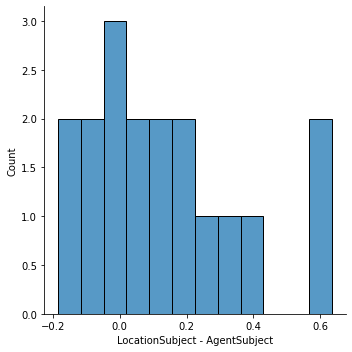

In [521]:
sns.displot(item_differences, bins=12)

In [522]:
item_differences.sort_values(ascending=False)

item_id  A             V        L           A concrete?  A countable?
64.0     worms         wriggl   bucket      True         True            0.634952
56.0     tadpoles      swimm    pond        True         True            0.602948
20.0     fireflies     glimmer  backyard    True         True            0.414093
8.0      cockroaches   creep    cave        True         True            0.320143
24.0     frogs         hopp     swamp       True         True            0.282538
18.0     birds         flutter  courtyard   True         True            0.210119
30.0     fear          prickl   fingertips  False        False           0.204257
39.0     sewage        runn     street      True         False           0.137191
6.0      terror        cours    body        False        False           0.128916
25.0     energy        humm     market      False        False           0.072649
7.0      excitement    crackl   theater     False        False           0.031563
41.0     trepidation   shak 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'cockroaches creep'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'fireflies glimmer'),
  Text(4, 0, 'birds flutter'),
  Text(5, 0, 'worms wriggl'),
  Text(6, 0, 'lights glow'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'bubbles foam'),
  Text(9, 0, 'excitement puls'),
  Text(10, 0, 'tadpoles swimm'),
  Text(11, 0, 'debris flow'),
  Text(12, 0, 'excitement crackl'),
  Text(13, 0, 'trepidation shak'),
  Text(14, 0, 'people bustl'),
  Text(15, 0, 'fear prickl'),
  Text(16, 0, 'anticipation tingl'),
  Text(17, 0, 'energy humm')])

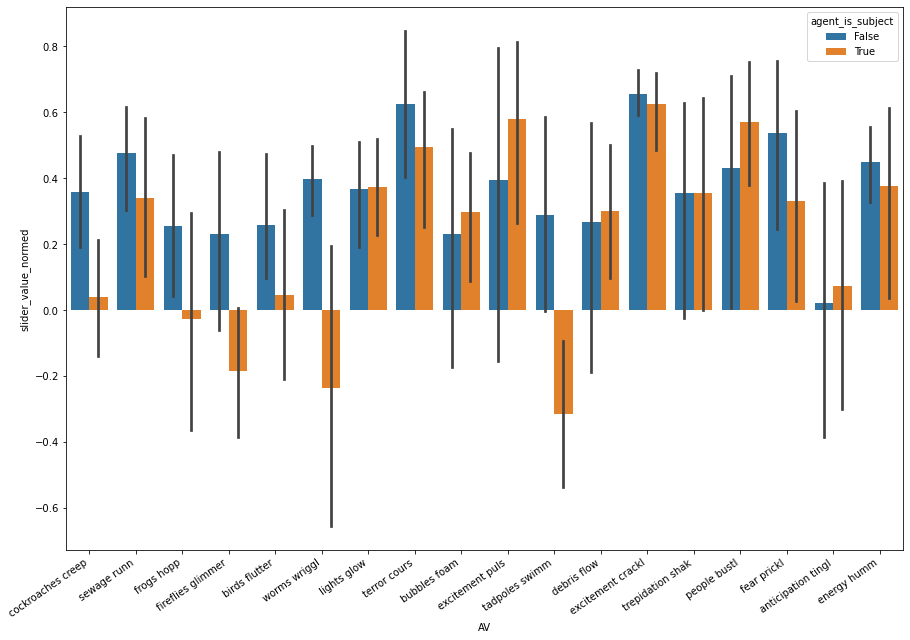

In [523]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

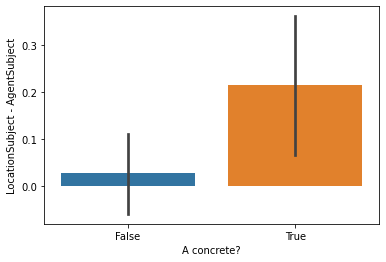

In [524]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

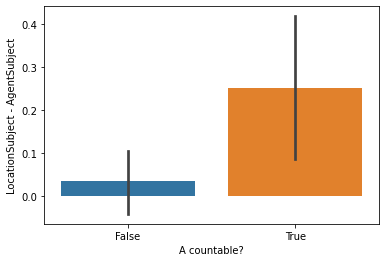

In [525]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [526]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.05, 0.95])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
item_bootstrap_df

,low,high
item_id,,
4.0,-1.120784,-0.753531
6.0,-0.355187,-0.229321
7.0,-0.160303,-0.119106
8.0,-0.092293,0.023119
17.0,-0.970114,-0.679163
18.0,-0.308295,-0.164192
19.0,-0.892336,-0.580081
20.0,-0.246730,-0.069521
22.0,-0.412940,-0.286581


In [527]:
item_bootstrap_df = \
    pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
             left_index=True, right_index=True).sort_values("low", ascending=False)

In [528]:
item_bootstrap_df.sort_values("low", ascending=False)

,low,high,A,V,AV,L
item_id,,,,,,
56,-0.064378,0.140435,tadpoles,swimm,tadpoles swimm,pond
8,-0.092293,0.023119,cockroaches,creep,cockroaches creep,cave
64,-0.104355,0.106104,worms,wriggl,worms wriggl,bucket
7,-0.160303,-0.119106,excitement,crackl,excitement crackl,theater
20,-0.246730,-0.069521,fireflies,glimmer,fireflies glimmer,backyard
18,-0.308295,-0.164192,birds,flutter,birds flutter,courtyard
25,-0.353944,-0.258996,energy,humm,energy humm,market
6,-0.355187,-0.229321,terror,cours,terror cours,body
39,-0.362491,-0.222060,sewage,runn,sewage runn,street


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'tadpoles swimm'),
  Text(1, 0, 'cockroaches creep'),
  Text(2, 0, 'worms wriggl'),
  Text(3, 0, 'excitement crackl'),
  Text(4, 0, 'fireflies glimmer'),
  Text(5, 0, 'birds flutter'),
  Text(6, 0, 'energy humm'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'sewage runn'),
  Text(9, 0, 'frogs hopp'),
  Text(10, 0, 'lights glow'),
  Text(11, 0, 'fear prickl'),
  Text(12, 0, 'trepidation shak'),
  Text(13, 0, 'bubbles foam'),
  Text(14, 0, 'anticipation tingl'),
  Text(15, 0, 'debris flow'),
  Text(16, 0, 'people bustl'),
  Text(17, 0, 'excitement puls')])

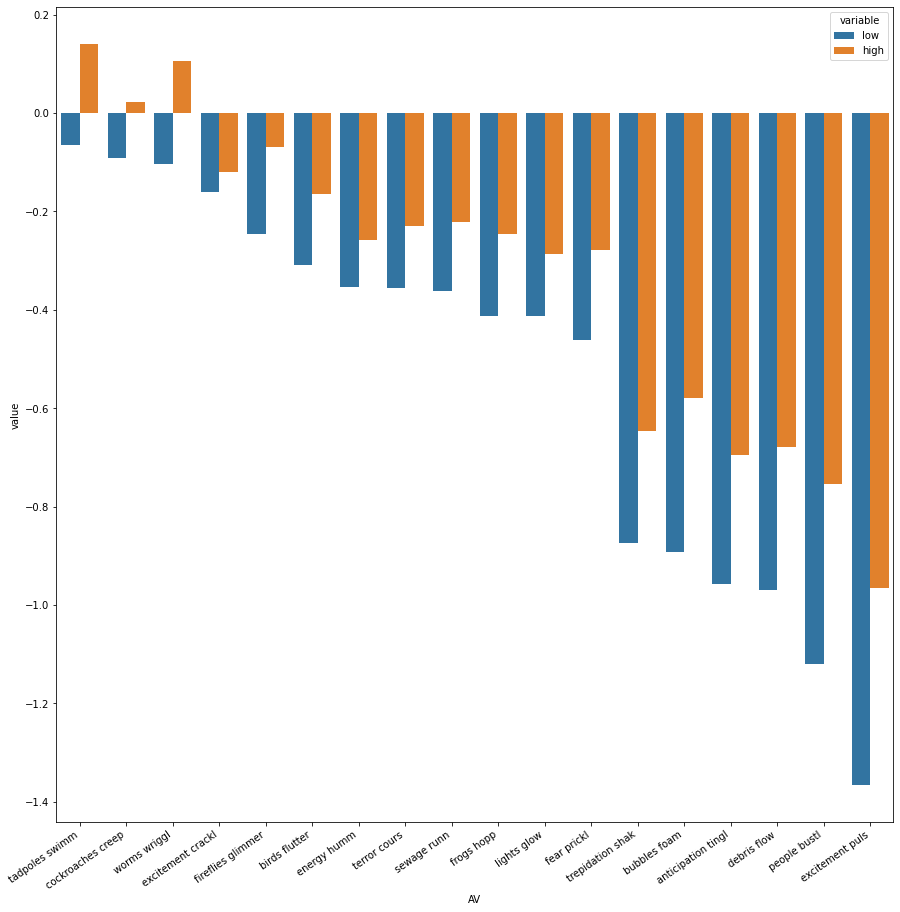

In [529]:
plt.subplots(figsize=(15, 15))
sns.barplot(
    data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
    x="AV", y="value", hue="variable")
plt.xticks(rotation=35, ha="right")

### Copouts

In [530]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [531]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_given", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout                            sum  count      mean
item_id agent_is_given agent_is_subject                      
25.0    True           False               1      6  0.166667
4.0     False          False               0      9  0.000000
30.0    True           False               0      2  0.000000
39.0    False          False               0      4  0.000000
31.0    True           True                0      2  0.000000
...                                      ...    ...       ...
18.0    True           True                0      4  0.000000
                       False               0      1  0.000000
        False          True                0      9  0.000000
                       False               0      3  0.000000
64.0    True           True                0      5  0.000000

[72 rows x 3 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

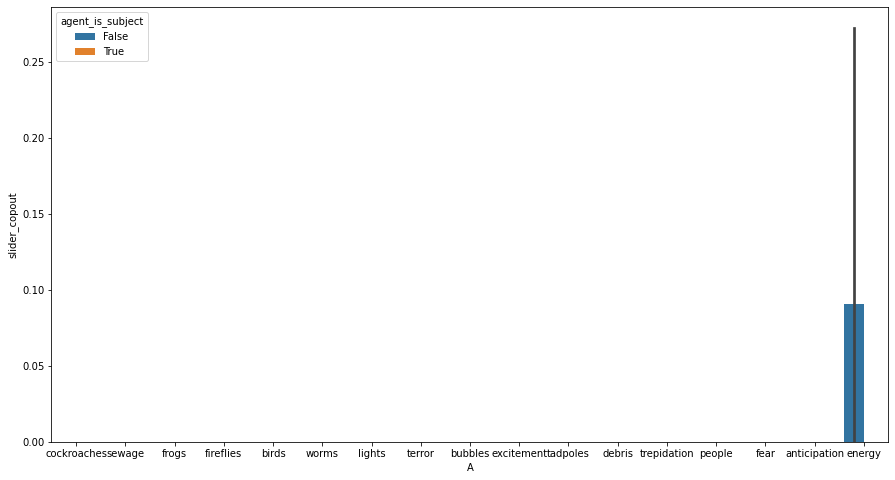

In [532]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

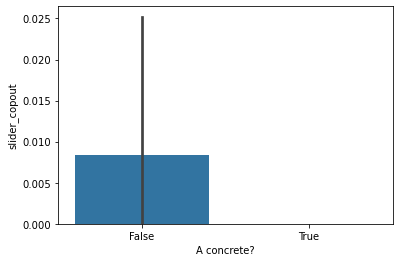

In [533]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

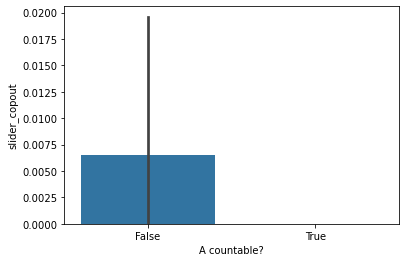

In [534]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

## Item exposure

In [535]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject"]).size().sort_values().head(20)

item_id  A             agent_is_given  agent_is_subject
22.0     lights        False           True                1
18.0     birds         True            False               1
17.0     debris        False           False               1
31.0     excitement    True            True                2
30.0     fear          True            False               2
25.0     energy        True            True                2
24.0     frogs         False           True                2
64.0     worms         True            False               2
22.0     lights        True            False               2
58.0     anticipation  True            False               2
7.0      excitement    True            True                2
58.0     anticipation  True            True                2
4.0      people        True            False               2
                                       True                2
8.0      cockroaches   False           False               3
56.0     tadpoles      True  

## Basic visualization: givenness manipulation

In [536]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [537]:
item_differences.sort_values()

item_id  A             V        L           AV                  A concrete?  A countable?  agent_is_given
17.0     debris        flow     river       debris flow         True         False         False            -1.783341
41.0     trepidation   shak     chest       trepidation shak    False        False         False            -0.438186
19.0     bubbles       foam     tub         bubbles foam        True         True          False            -0.405159
31.0     excitement    puls     temples     excitement puls     False        False         False            -0.364306
58.0     anticipation  tingl    arms        anticipation tingl  False        False         True             -0.326896
4.0      people        bustl    square      people bustl        True         True          False            -0.176546
30.0     fear          prickl   fingertips  fear prickl         False        False         False            -0.164731
6.0      terror        cours    body        terror cours        Fals

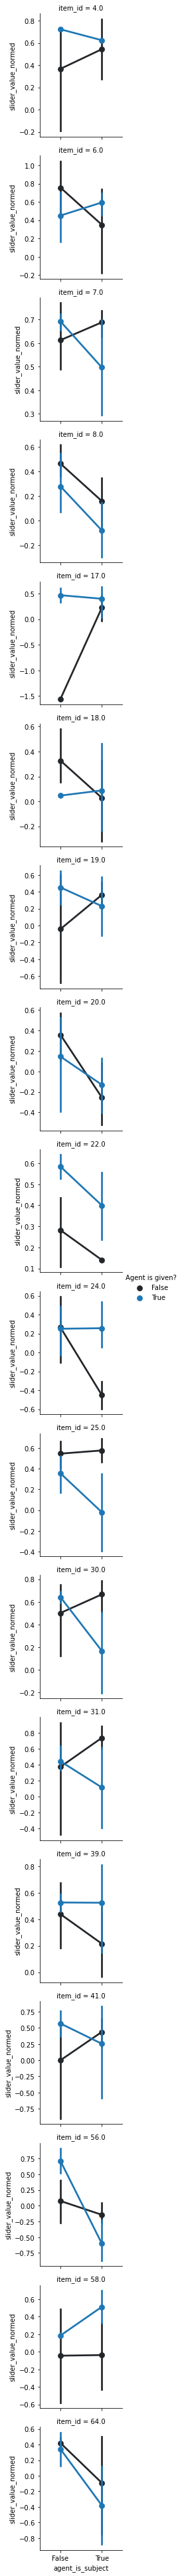

In [538]:
g = sns.FacetGrid(data=merged_df.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

## Extras

In [539]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])